In [125]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)


# 직장인구- 상권
> 데이터프레임 
* 직장인구 상권
* 직장인구_상권_그룹1
* 직장인구_상권_그룹2

In [126]:
직장인구_상권= pd.read_csv('/Users/leegahee/git_folder/semi_project/강남구/직장인구-상권.csv',encoding='EUC-KR')
직장인구_상권_raw = 직장인구_상권.copy
직장인구_상권.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,A,골목상권,3110980,개포지구대옆,613,361,252,2,95,...,78,104,82,66,2,64,69,56,43,18
1,20191,A,골목상권,3110950,논현역 7번,344,203,141,0,76,...,78,60,23,16,0,50,50,25,13,3
2,20191,D,발달상권,3120200,학동사거리,15890,7170,8720,119,5867,...,2671,1460,660,461,66,4002,2895,1175,383,199
3,20191,D,발달상권,3120223,휘문고교사거리,7590,4521,3069,27,1449,...,1769,1274,532,371,14,887,1116,564,279,209
4,20191,D,발달상권,3120210,선릉역,59677,30858,28819,276,16803,...,9517,7145,4609,2663,154,10001,7280,5451,4275,1658


In [127]:
직장인구_상권['기준_년분기_코드'].unique()

array([20191, 20212, 20221, 20222, 20223, 20224, 20231, 20232, 20233,
       20214, 20194, 20202, 20203, 20204, 20213, 20201, 20211])

In [128]:
condition = 직장인구_상권['기준_년분기_코드'].isin([20231, 20232, 20233, 20234])
직장인구_상권 = 직장인구_상권[condition]
직장인구_상권['기준_년분기_코드'].unique()

array([20231, 20232, 20233])

In [129]:
직장인구_상권.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 612 to 1733
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준_년분기_코드            306 non-null    int64 
 1   상권_구분_코드             306 non-null    object
 2   상권_구분_코드_명           306 non-null    object
 3   상권_코드                306 non-null    int64 
 4   상권_코드_명              306 non-null    object
 5   총_직장_인구_수            306 non-null    int64 
 6   남성_직장_인구_수           306 non-null    int64 
 7   여성_직장_인구_수           306 non-null    int64 
 8   연령대_10_직장_인구_수       306 non-null    int64 
 9   연령대_20_직장_인구_수       306 non-null    int64 
 10  연령대_30_직장_인구_수       306 non-null    int64 
 11  연령대_40_직장_인구_수       306 non-null    int64 
 12  연령대_50_직장_인구_수       306 non-null    int64 
 13  연령대_60_이상_직장_인구_수    306 non-null    int64 
 14  남성연령대_10_직장_인구_수     306 non-null    int64 
 15  남성연령대_20_직장_인구_수     306 non-null    int64 
 16  남성연령대_30_직

In [130]:
직장인구_상권['상권_구분_코드'].unique()
# A : 골목상권
# D : 발달상권
# R : 전통시장
# U : 관광특구

array(['D', 'A', 'R', 'U'], dtype=object)

In [131]:
A_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'D']
D_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'D']
R_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'D']
U_raw = 직장인구_상권[직장인구_상권['상권_구분_코드'] == 'D']
A = A_raw.copy()
D = D_raw.copy()
R = R_raw.copy()
U = U_raw.copy()


In [147]:
len(A),len(D),len(R),len(U)

(75, 75, 117, 117)

# 함수

In [132]:
import matplotlib.pyplot as plt

# IQR 계산
def iqr_cal(df, column):

    q25 = np.percentile(df[column].values,25)
    q75 = np.percentile(df[column].values,75)
    iqr = q75-q25
    iqr_weight = iqr*1.5
    low = q25 - iqr_weight
    high = q75+iqr_weight
    return low,high


In [133]:
# 이상치 탐지
def find_outlier_value(df,column):
    temp = []
    for i in df[column] :
        if  (i < iqr_cal(df,column)[0]) or (i > iqr_cal(df,column)[1]) :
            temp.append(i)
    return temp


In [134]:
# 이상치 탐지
def find_outlier_value_len(df,column):
    temp = []
    for i in df[column] :
        if  (i < iqr_cal(df,column)[0]) or (i > iqr_cal(df,column)[1]) :
            temp.append(i)
    print(f'{column} 에 이상치 {len(temp)} 개 존재')
    return temp


In [135]:
def find_outlier(df):
    outliers = []
    for i in range(5, 14):
        outliers.append(find_outlier_value_len(df, df.columns[i]))
    return outliers


In [136]:
def remove_outliers(df):
    for i in range(5,14):
        outliers = find_outlier_value(df,df.columns[i])
        df = df[~df.iloc[:,i].isin(outliers)]
    return df

# A : 골목상권

In [137]:
find_outlier(A)

총_직장_인구_수 에 이상치 18 개 존재
남성_직장_인구_수 에 이상치 18 개 존재
여성_직장_인구_수 에 이상치 18 개 존재
연령대_10_직장_인구_수 에 이상치 6 개 존재
연령대_20_직장_인구_수 에 이상치 15 개 존재
연령대_30_직장_인구_수 에 이상치 18 개 존재
연령대_40_직장_인구_수 에 이상치 18 개 존재
연령대_50_직장_인구_수 에 이상치 21 개 존재
연령대_60_이상_직장_인구_수 에 이상치 6 개 존재


[[27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363],
 [18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865],
 [20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138],
 [202, 244, 202, 244, 202, 244],
 [9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093],
 [8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234],
 [6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678],
 [4352,
  8408,
  10081,
  4061

In [138]:
A = remove_outliers(A)

In [140]:
A_raw.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,14699.410256,8540.384615,6159.025641,54.974359,3071.256410,4515.333333,3562.948718,2303.974359,1190.923077
std,15077.330524,9425.218968,6004.718362,56.189099,2764.235812,4818.736086,4065.790908,2690.410629,1189.321504
min,290.000000,54.000000,236.000000,0.000000,116.000000,103.000000,58.000000,13.000000,0.000000
25%,5716.000000,3394.000000,2586.000000,19.000000,1393.000000,2070.000000,1493.000000,895.000000,350.000000
50%,11437.000000,5797.000000,4580.000000,34.000000,2669.000000,3177.000000,2477.000000,1401.000000,769.000000
75%,13888.000000,8123.000000,6079.000000,87.000000,3417.000000,4202.000000,3167.000000,1923.000000,1805.000000
max,61667.000000,40706.000000,21983.000000,244.000000,11358.000000,22506.000000,18178.000000,10840.000000,4669.000000


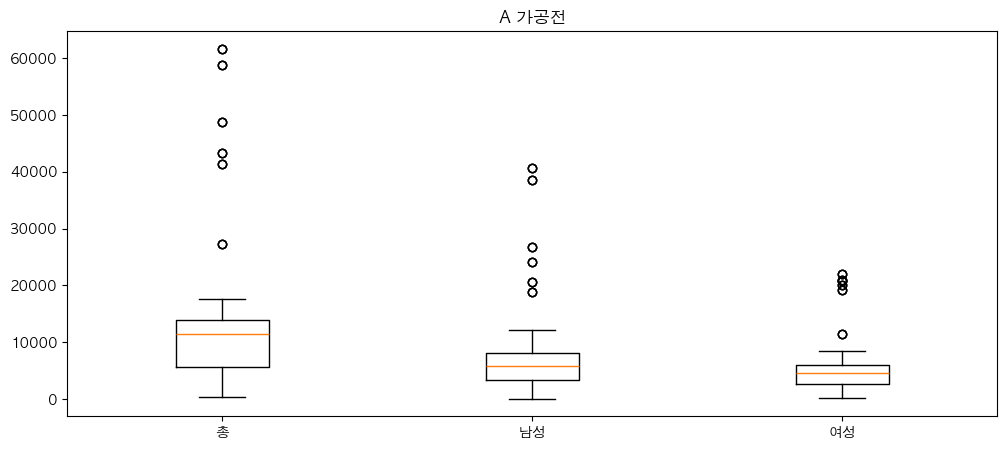

In [164]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('A 가공전')
plt.boxplot([A_raw.iloc[:,5], A_raw.iloc[:,6], A_raw.iloc[:,7]],labels=label)
plt.show()

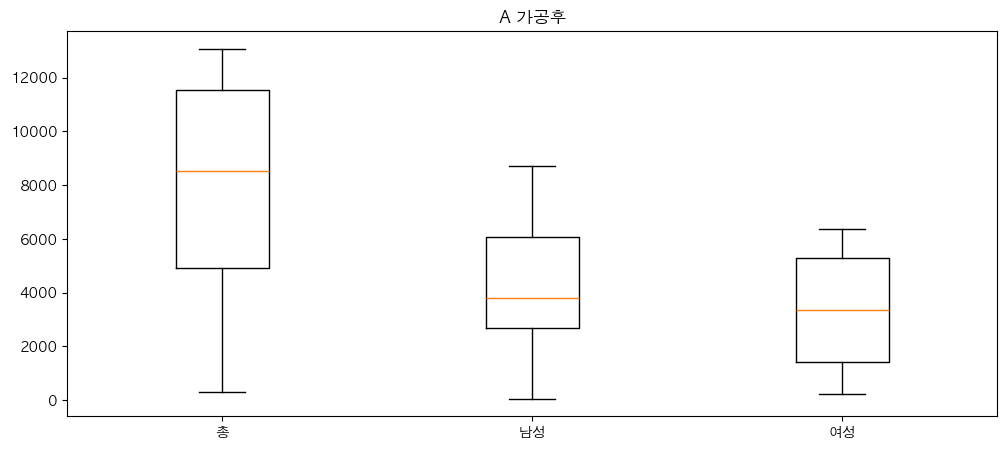

In [165]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('A 가공후')
plt.boxplot([A.iloc[:,5], A.iloc[:,6], A.iloc[:,7]],labels=label)
plt.show()

# D : 발달상권

In [142]:
find_outlier(D)

총_직장_인구_수 에 이상치 18 개 존재
남성_직장_인구_수 에 이상치 18 개 존재
여성_직장_인구_수 에 이상치 18 개 존재
연령대_10_직장_인구_수 에 이상치 6 개 존재
연령대_20_직장_인구_수 에 이상치 15 개 존재
연령대_30_직장_인구_수 에 이상치 18 개 존재
연령대_40_직장_인구_수 에 이상치 18 개 존재
연령대_50_직장_인구_수 에 이상치 21 개 존재
연령대_60_이상_직장_인구_수 에 이상치 6 개 존재


[[27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363],
 [18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865],
 [20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138],
 [202, 244, 202, 244, 202, 244],
 [9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093],
 [8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234],
 [6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678],
 [4352,
  8408,
  10081,
  4061

In [143]:
D = remove_outliers(D)

In [144]:
D.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000
mean,7663.280000,4323.440000,3339.840000,25.080000,1798.12000,2468.680000,1802.480000,1031.120000,537.800000
std,3986.745121,2400.938365,1898.767538,16.150274,1091.33776,1320.249538,942.587445,554.245456,310.275248
min,290.000000,54.000000,236.000000,0.000000,116.00000,103.000000,58.000000,13.000000,0.000000
25%,4934.000000,2685.000000,1404.000000,11.000000,720.00000,1628.000000,1102.000000,508.000000,280.000000
50%,8521.000000,3808.000000,3371.000000,26.000000,1785.00000,2485.000000,1890.000000,1044.000000,552.000000
75%,11531.000000,6075.000000,5298.000000,37.000000,2723.00000,3529.000000,2578.000000,1509.000000,770.000000
max,13076.000000,8724.000000,6377.000000,64.000000,3624.00000,4419.000000,3218.000000,1923.000000,1136.000000


In [145]:
D_raw.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,14699.410256,8540.384615,6159.025641,54.974359,3071.256410,4515.333333,3562.948718,2303.974359,1190.923077
std,15077.330524,9425.218968,6004.718362,56.189099,2764.235812,4818.736086,4065.790908,2690.410629,1189.321504
min,290.000000,54.000000,236.000000,0.000000,116.000000,103.000000,58.000000,13.000000,0.000000
25%,5716.000000,3394.000000,2586.000000,19.000000,1393.000000,2070.000000,1493.000000,895.000000,350.000000
50%,11437.000000,5797.000000,4580.000000,34.000000,2669.000000,3177.000000,2477.000000,1401.000000,769.000000
75%,13888.000000,8123.000000,6079.000000,87.000000,3417.000000,4202.000000,3167.000000,1923.000000,1805.000000
max,61667.000000,40706.000000,21983.000000,244.000000,11358.000000,22506.000000,18178.000000,10840.000000,4669.000000


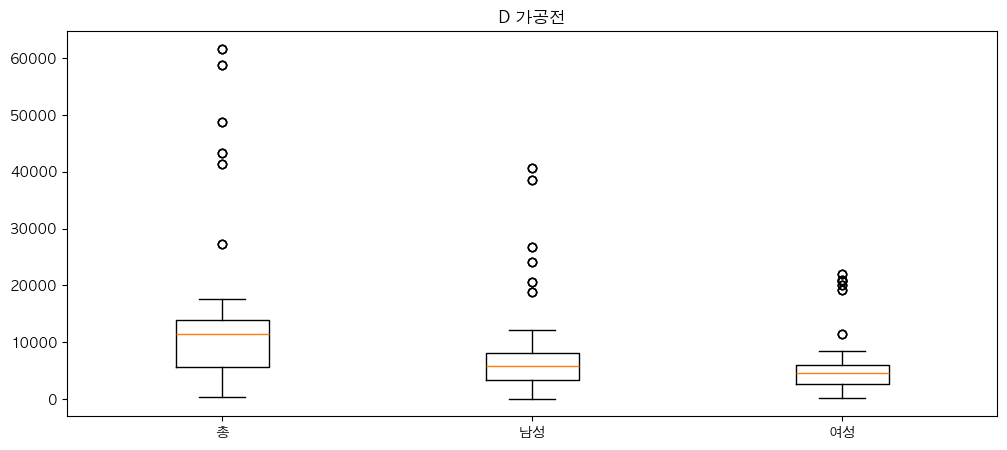

In [162]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('D 가공전')
plt.boxplot([D_raw.iloc[:,5], D_raw.iloc[:,6], D_raw.iloc[:,7]],labels=label)
plt.show()

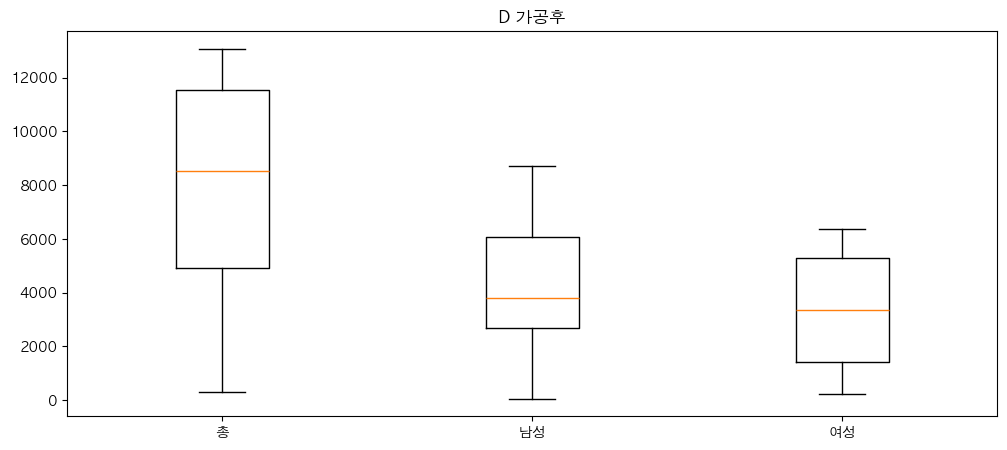

In [163]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['총','남성','여성']
plt.title('D 가공후')
plt.boxplot([D.iloc[:,5], D.iloc[:,6], D.iloc[:,7]],labels=label)
plt.show()

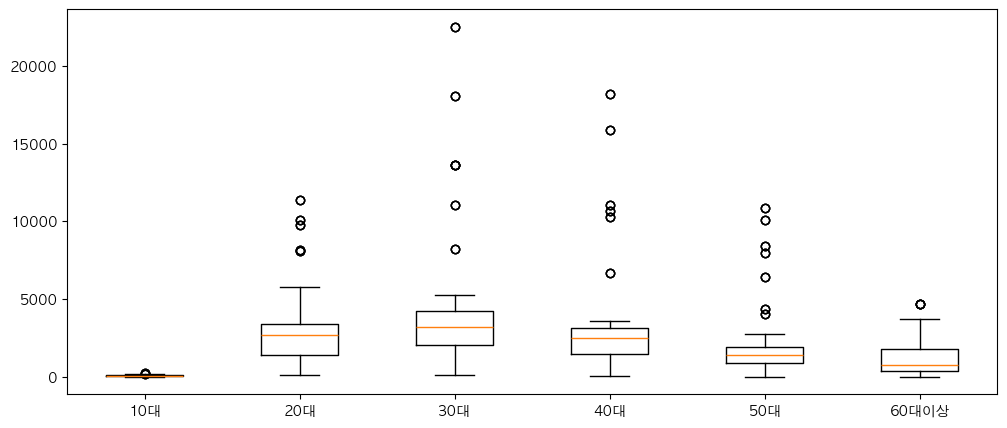

In [158]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.boxplot([D_raw.iloc[:,8], D_raw.iloc[:,9], D_raw.iloc[:,10],D_raw.iloc[:,11],D_raw.iloc[:,12],D_raw.iloc[:,13]],labels=label)
plt.show()

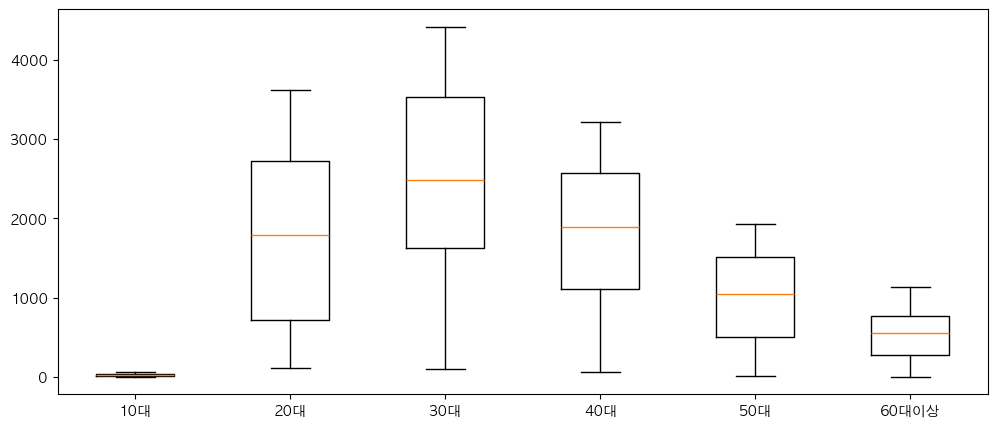

In [159]:
ax, pig = plt.subplots(figsize=(12,5))
label = ['10대','20대','30대','40대','50대','60대이상']
plt.boxplot([D.iloc[:,8], D.iloc[:,9], D.iloc[:,10],D.iloc[:,11],D.iloc[:,12],D.iloc[:,13]],labels=label)
plt.show()

# R : 전통시장

In [148]:
find_outlier(R)

총_직장_인구_수 에 이상치 18 개 존재
남성_직장_인구_수 에 이상치 18 개 존재
여성_직장_인구_수 에 이상치 18 개 존재
연령대_10_직장_인구_수 에 이상치 6 개 존재
연령대_20_직장_인구_수 에 이상치 15 개 존재
연령대_30_직장_인구_수 에 이상치 18 개 존재
연령대_40_직장_인구_수 에 이상치 18 개 존재
연령대_50_직장_인구_수 에 이상치 21 개 존재
연령대_60_이상_직장_인구_수 에 이상치 6 개 존재


[[27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363,
  61667,
  41471,
  43324,
  48780,
  58731,
  61667,
  41471,
  43324,
  48780,
  58731,
  27363],
 [18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865,
  40706,
  20644,
  24141,
  26797,
  38593,
  40706,
  20644,
  24141,
  26797,
  38593,
  18865],
 [20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138,
  20961,
  20827,
  11378,
  19183,
  21983,
  20138],
 [202, 244, 202, 244, 202, 244],
 [9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093,
  9756,
  8167,
  8091,
  11358,
  10093],
 [8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234,
  22506,
  11056,
  13641,
  13636,
  18065,
  22506,
  11056,
  13641,
  13636,
  18065,
  8234],
 [6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678,
  18178,
  10671,
  10294,
  11065,
  15897,
  18178,
  10671,
  10294,
  11065,
  15897,
  6678],
 [4352,
  8408,
  10081,
  4061

In [149]:
R = remove_outliers(R)

In [150]:
R.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000
mean,7663.280000,4323.440000,3339.840000,25.080000,1798.12000,2468.680000,1802.480000,1031.120000,537.800000
std,3986.745121,2400.938365,1898.767538,16.150274,1091.33776,1320.249538,942.587445,554.245456,310.275248
min,290.000000,54.000000,236.000000,0.000000,116.00000,103.000000,58.000000,13.000000,0.000000
25%,4934.000000,2685.000000,1404.000000,11.000000,720.00000,1628.000000,1102.000000,508.000000,280.000000
50%,8521.000000,3808.000000,3371.000000,26.000000,1785.00000,2485.000000,1890.000000,1044.000000,552.000000
75%,11531.000000,6075.000000,5298.000000,37.000000,2723.00000,3529.000000,2578.000000,1509.000000,770.000000
max,13076.000000,8724.000000,6377.000000,64.000000,3624.00000,4419.000000,3218.000000,1923.000000,1136.000000


In [151]:
R_raw.iloc[:,5:14].describe()

,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,14699.410256,8540.384615,6159.025641,54.974359,3071.256410,4515.333333,3562.948718,2303.974359,1190.923077
std,15077.330524,9425.218968,6004.718362,56.189099,2764.235812,4818.736086,4065.790908,2690.410629,1189.321504
min,290.000000,54.000000,236.000000,0.000000,116.000000,103.000000,58.000000,13.000000,0.000000
25%,5716.000000,3394.000000,2586.000000,19.000000,1393.000000,2070.000000,1493.000000,895.000000,350.000000
50%,11437.000000,5797.000000,4580.000000,34.000000,2669.000000,3177.000000,2477.000000,1401.000000,769.000000
75%,13888.000000,8123.000000,6079.000000,87.000000,3417.000000,4202.000000,3167.000000,1923.000000,1805.000000
max,61667.000000,40706.000000,21983.000000,244.000000,11358.000000,22506.000000,18178.000000,10840.000000,4669.000000
